# Random forest

In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


Still titanic data:

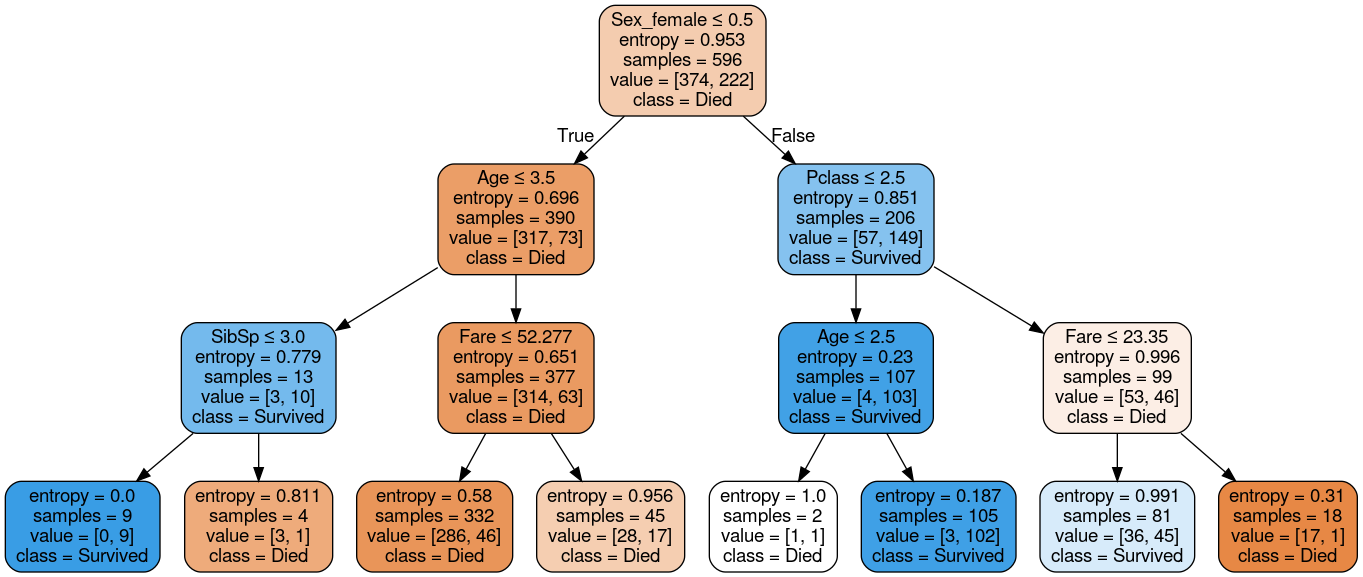

In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus

titanic_data = pd.read_csv('train.csv')
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
x = pd.get_dummies(x)
x = x.fillna({'Age': x.Age.median()})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Using minimum samples split and leaf options in grid search:

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
search = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = {
        'criterion': ('gini', 'entropy'),
        'max_depth': range(1, 11),
        'min_samples_split': range(5, 51, 5),
        'min_samples_leaf': range(5, 51, 5)
    },
    cv=10,
    n_jobs=8,
    iid=False
)

In [5]:
search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=8,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 11),
                         'mi

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}


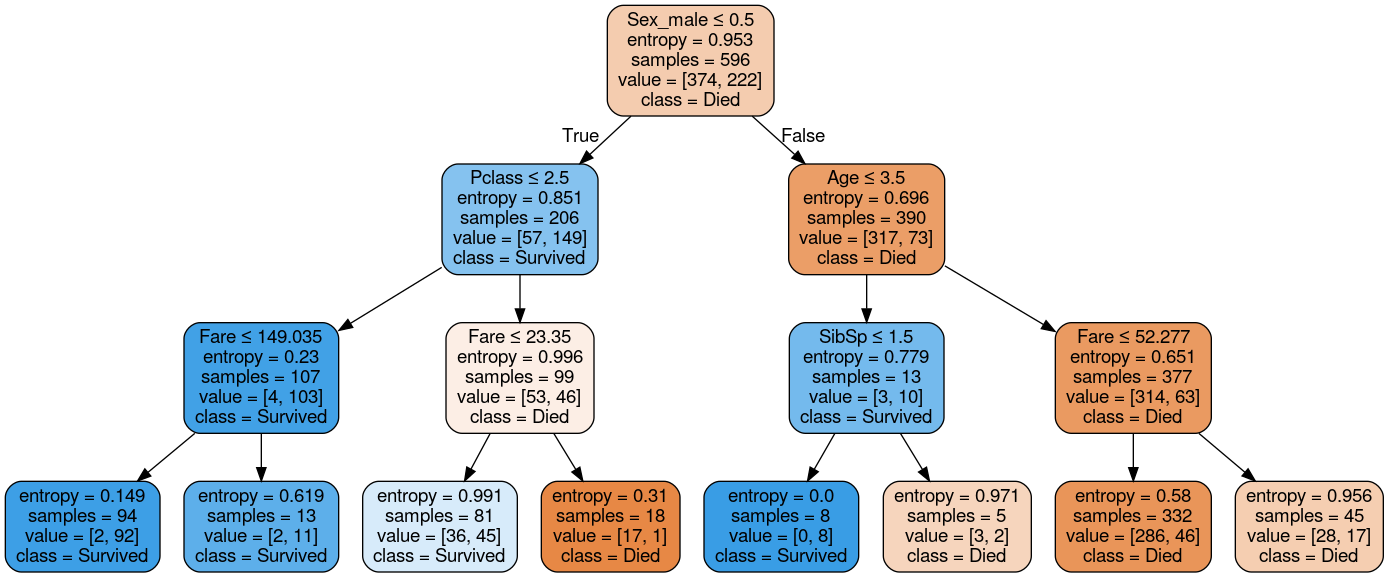

In [6]:
print(search.best_params_)
best_clf = search.best_estimator_
dot_data = tree.export_graphviz(best_clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [7]:
best_clf.score(x_test, y_test)

0.823728813559322

In [8]:
from sklearn.ensemble import RandomForestClassifier

Task on Random Forest:

In [9]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [10]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': range(10, 101, 10),
        'max_depth': (2, 5, 7, 10)
    },
    cv=5,
    n_jobs=8,
    iid=False
)

In [11]:
search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
print(search_rf.best_params_)
best_clf_rf = search_rf.best_estimator_
best_clf_rf.score(x_test, y_test)

{'max_depth': 5, 'n_estimators': 40}


0.8203389830508474

In [13]:
feature_importances = best_clf_rf.feature_importances_

In [14]:
feature_importances_df = pd.DataFrame({
    'feature': list(x_train),
    'feature_importance': feature_importances
})

In [15]:
feature_importances_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
6,Sex_male,0.266132
5,Sex_female,0.249346
4,Fare,0.127071
0,Pclass,0.123513
1,Age,0.115409
2,SibSp,0.036915
3,Parch,0.033664
7,Embarked_C,0.023251
9,Embarked_S,0.015259
8,Embarked_Q,0.009440


Task on feature importances:

In [16]:
heart = pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


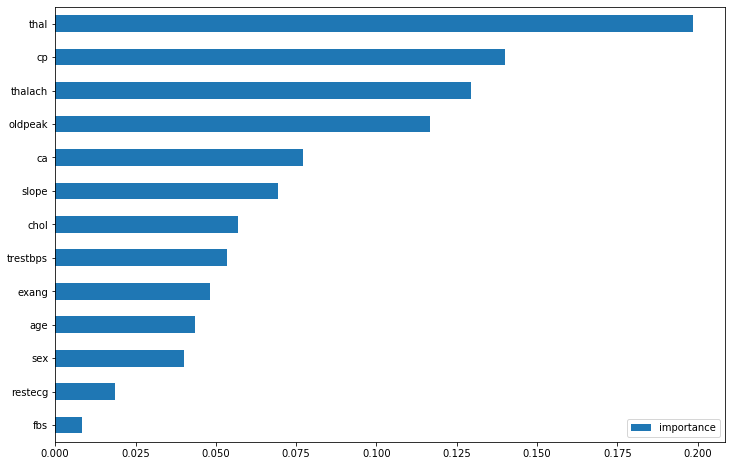

In [17]:
np.random.seed(0)
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

xt, yt = heart.drop('target', axis=1), heart.target
rf.fit(xt, yt)

imp = pd.DataFrame(rf.feature_importances_, index=xt.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Task on mushrooms data:

In [18]:
mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
print(mush.shape)
mush.head()

(6093, 23)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [40]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(random_state=0),
    param_grid = {
        'n_estimators': range(10, 51, 10),
        'max_depth': range(1, 12, 2),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 9, 2)
    },
    cv=3,
    n_jobs=8,
    iid=False
)

In [41]:
search_rf.fit(mush.drop('class', axis=1), mush['class'])

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=8,
             param_grid={'max_d

In [42]:
best_clf_rf = search_rf.best_estimator_
search_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

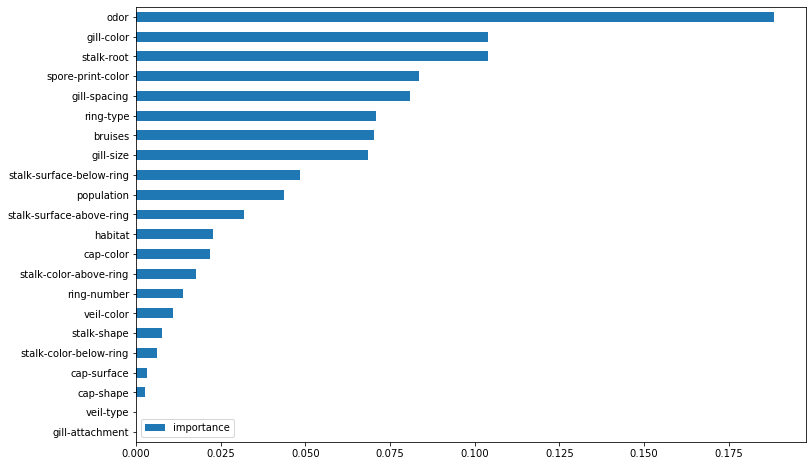

In [45]:
pd.DataFrame(best_clf_rf.feature_importances_,
             index=mush.drop('class', axis=1).columns,
             columns=['importance']
).sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [46]:
y_pred = best_clf_rf.predict(
    pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
)
y_pred.sum()

976

In [47]:
from sklearn.metrics import confusion_matrix

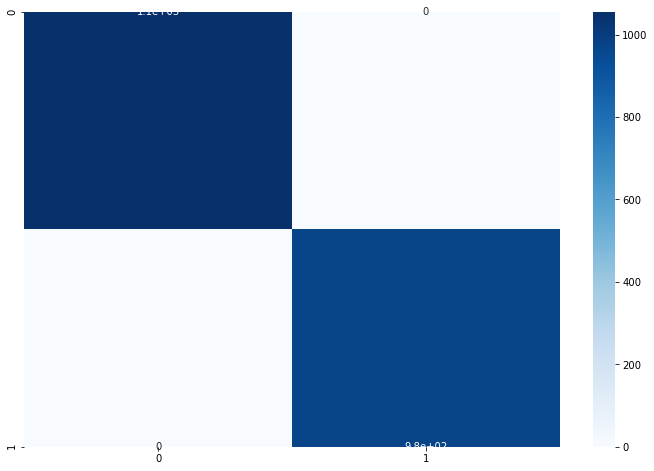

In [48]:
cm = confusion_matrix(
    pd.read_csv('testing_y_mush.csv'),
    y_pred
)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

Task on invasion data:

In [50]:
inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
print(inv.shape)
inv.head()

(500, 7)


,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [51]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': range(10, 51, 10),
        'max_depth': range(1, 12, 2),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 9, 2)
    },
    cv=5,
    n_jobs=8,
    iid=False
)

In [52]:
x_inv, y_inv = inv.drop('class', axis=1), inv['class']

In [53]:
search_rf.fit(x_inv, y_inv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [54]:
best_clf_rf = search_rf.best_estimator_

In [55]:
new_inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
print(new_inv.shape)
new_inv.head()

(1500, 6)


,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [56]:
y_pred = best_clf_rf.predict(new_inv)

In [57]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

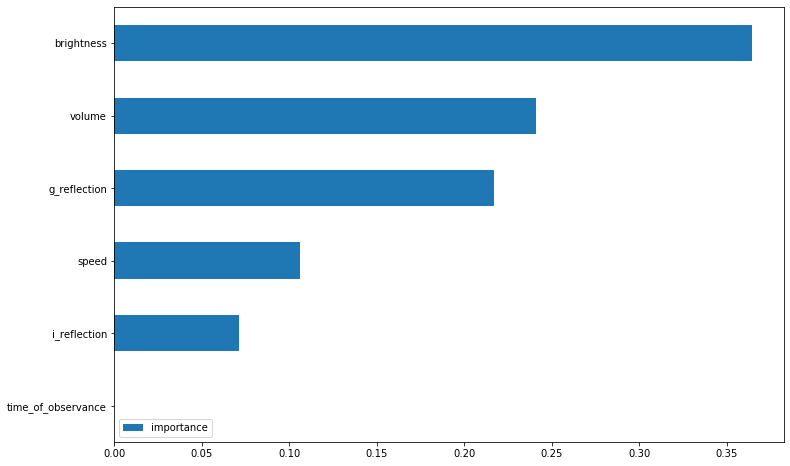

In [59]:
pd.DataFrame(best_clf_rf.feature_importances_,
             index=x_inv.columns,
             columns=['importance']
).sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

Task on dangerous regions of space:

In [60]:
drs = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
print(drs.shape)
drs.head()

(100000, 8)


,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


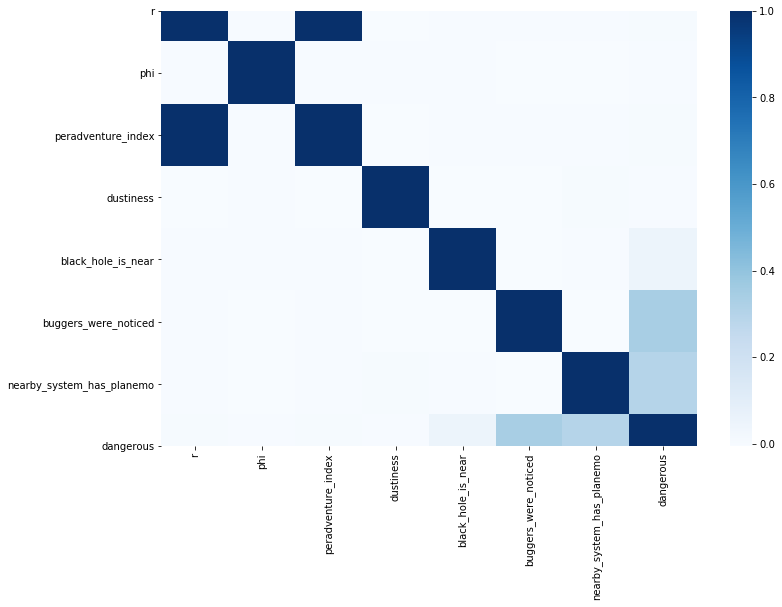

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(drs.corr(), cmap='Blues')
plt.show()